In [2]:
HOME = "C:\\Users\\paslanpatir\\Documents\\GitHub\\fall21-yurdadonpelin\\"
setwd(HOME)

#Call necessary packages
options(warn = -1)
options(scipen=999)
require(data.table)
require(tidyverse)
require(ggplot2)
library(skimr)

library(RCurl)

# Task 1: Dimensionality Reduction

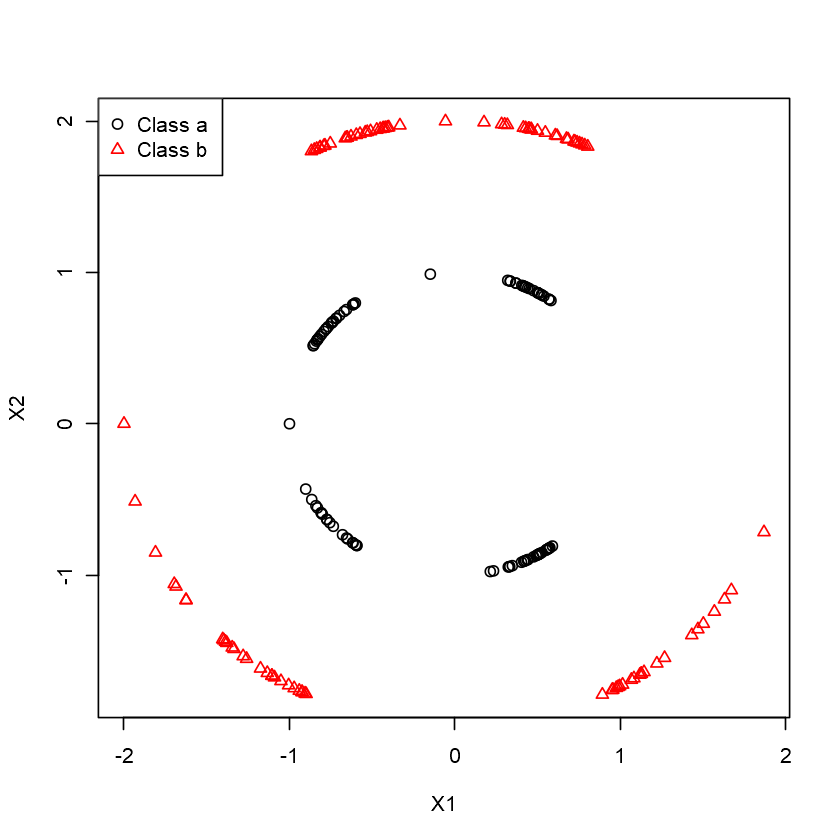

In [4]:
dat=read.csv('IE582_Fall21_HW2_q1_data.csv',header=T)
lev=as.numeric(dat[,3])
plot(dat[,1],dat[,2],col=lev,pch=lev,xlab=names(dat)[1],ylab=names(dat)[2])
legend("topleft",paste("Class",levels(dat[,3])),col=unique(lev), pch= unique(lev))

In [5]:
head(dat)
summary(dat)
skim(dat)

,X1,X2,class
,<dbl>,<dbl>,<fct>
1,0.5694828,0.8220033,a
2,0.4114692,0.9114237,a
3,0.4173846,-0.9087299,a
4,-0.7918276,0.6107447,a
5,-0.8067767,-0.5908565,a
6,-0.7154271,0.6986874,a


       X1                X2          class 
 Min.   :-2.0000   Min.   :-1.7908   a:99  
 1st Qu.:-0.7994   1st Qu.:-0.9445   b:99  
 Median :-0.2408   Median : 0.2578         
 Mean   :-0.1147   Mean   : 0.1006         
 3rd Qu.: 0.5128   3rd Qu.: 0.9786         
 Max.   : 1.8671   Max.   : 1.9992         

-- Data Summary ------------------------
                           Values
Name                       dat   
Number of rows             198   
Number of columns          3     
_______________________          
Column type frequency:           
  factor                   1     
  numeric                  2     
________________________         
Group variables            None  

-- Variable type: factor -------------------------------------------------------
# A tibble: 1 x 6
  skim_variable n_missing complete_rate ordered n_unique top_counts  
* <chr>             <int>         <dbl> <lgl>      <int> <chr>       
1 class                 0             1 FALSE          2 a: 99, b: 99

-- Variable type: numeric ------------------------------------------------------
# A tibble: 2 x 11
  skim_variable n_missing complete_rate   mean    sd    p0    p25    p50   p75
* <chr>             <int>         <dbl>  <dbl> <dbl> <dbl>  <dbl>  <dbl> <dbl>
1 X1                    0             1 -0.115 0.8

*We do not know the unit details of X1 and X2 columns. In other words, we do not know if they have the same unit or if they are scaled or not. Therefore, I assume that their scales are different and they need to be scaled before applying a distance metric.*

## OneDimensional

### PCA

Importance of components:
                          Comp.1    Comp.2
Standard deviation     1.0004424 0.9995574
Proportion of Variance 0.5004425 0.4995575
Cumulative Proportion  0.5004425 1.0000000

Loadings:
   Comp.1 Comp.2
X1  0.707  0.707
X2  0.707 -0.707

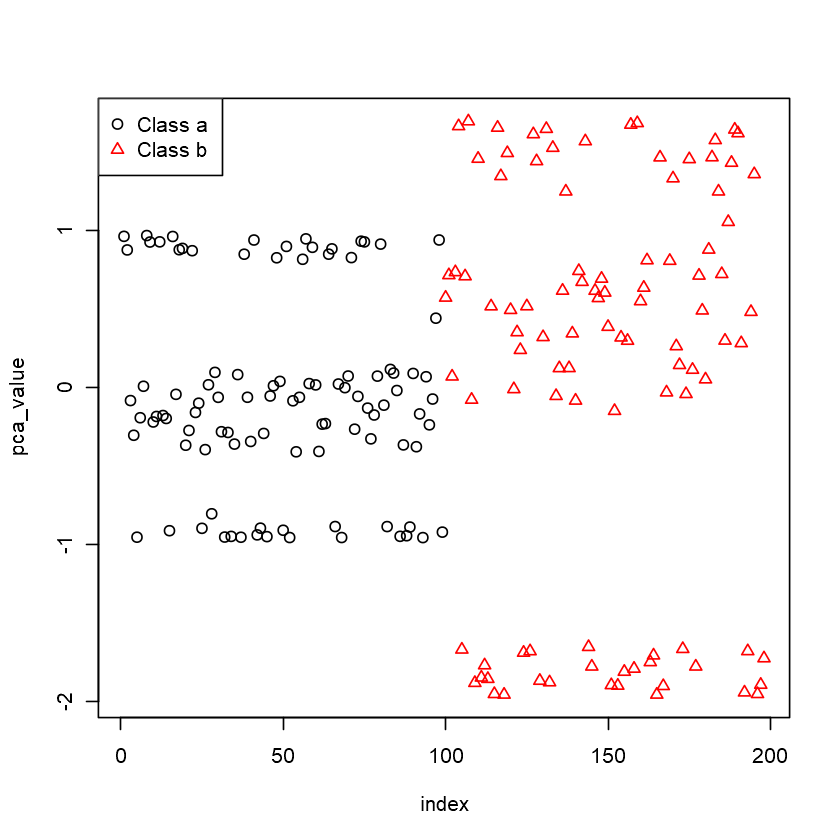

In [7]:
#When princomp is used, there is no need to perform scaling on the data since cor =TRUE takes care of scaling.
pca_dat <- princomp(dat[,-3], cor = TRUE, scores = TRUE)
summary(pca_dat, loadings = TRUE)
pca_var <- pca_dat$scores

plot(x = c(1:nrow(pca_var)),y = pca_var[,1],col=lev,pch=lev, ylab= "pca_value", xlab = "index")
legend("topleft",paste("Class",levels(dat[,3])),col=unique(lev), pch= unique(lev))

### MDS

integer(0)

integer(0)

integer(0)

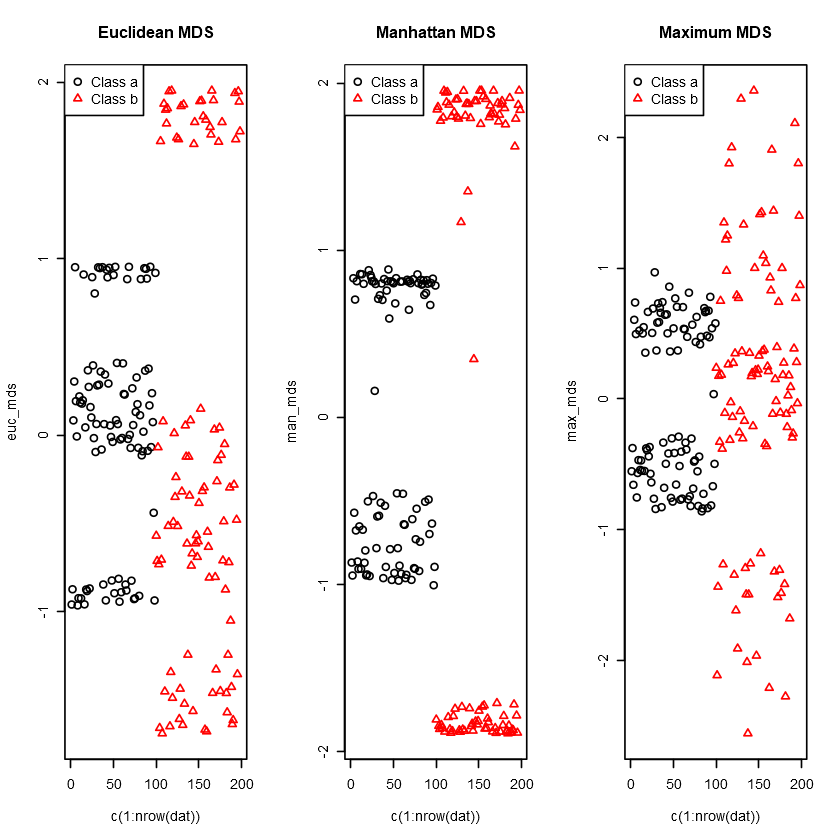

In [8]:
#First scale the data:
scaled_dat <- scale(dat[,-3],center = TRUE, scale = TRUE)
# create distance matrix:
scaled_dist_euc = as.data.table(as.matrix(dist(scaled_dat, method = "euclidean")))
scaled_dist_man = as.data.table(as.matrix(dist(scaled_dat, method = "manhattan")))
scaled_dist_max = as.data.table(as.matrix(dist(scaled_dat, method = "maximum")))

#Apply MDS:
euc_mds = cmdscale(scaled_dist_euc, k = 1) # obtain 1 dimension
man_mds = cmdscale(scaled_dist_man, k = 1) # obtain 1 dimension
max_mds = cmdscale(scaled_dist_max, k = 1) # obtain 1 dimension

par(mfrow=c(1,3))
plot(x = c(1:nrow(dat)),y = euc_mds,col=lev,pch=lev) + title("Euclidean MDS")
legend("topleft",paste("Class",levels(dat[,3])),col=unique(lev), pch= unique(lev), ylab= "mds_value", xlab = "index")
plot(x = c(1:nrow(dat)),y = man_mds,col=lev,pch=lev) + title("Manhattan MDS")
legend("topleft",paste("Class",levels(dat[,3])),col=unique(lev), pch= unique(lev), ylab= "mds_value", xlab = "index")
plot(x = c(1:nrow(dat)),y = max_mds,col=lev,pch=lev) + title("Maximum MDS")
legend("topleft",paste("Class",levels(dat[,3])),col=unique(lev), pch= unique(lev), ylab= "mds_value", xlab = "index")

### Comparison

integer(0)

integer(0)

integer(0)

integer(0)

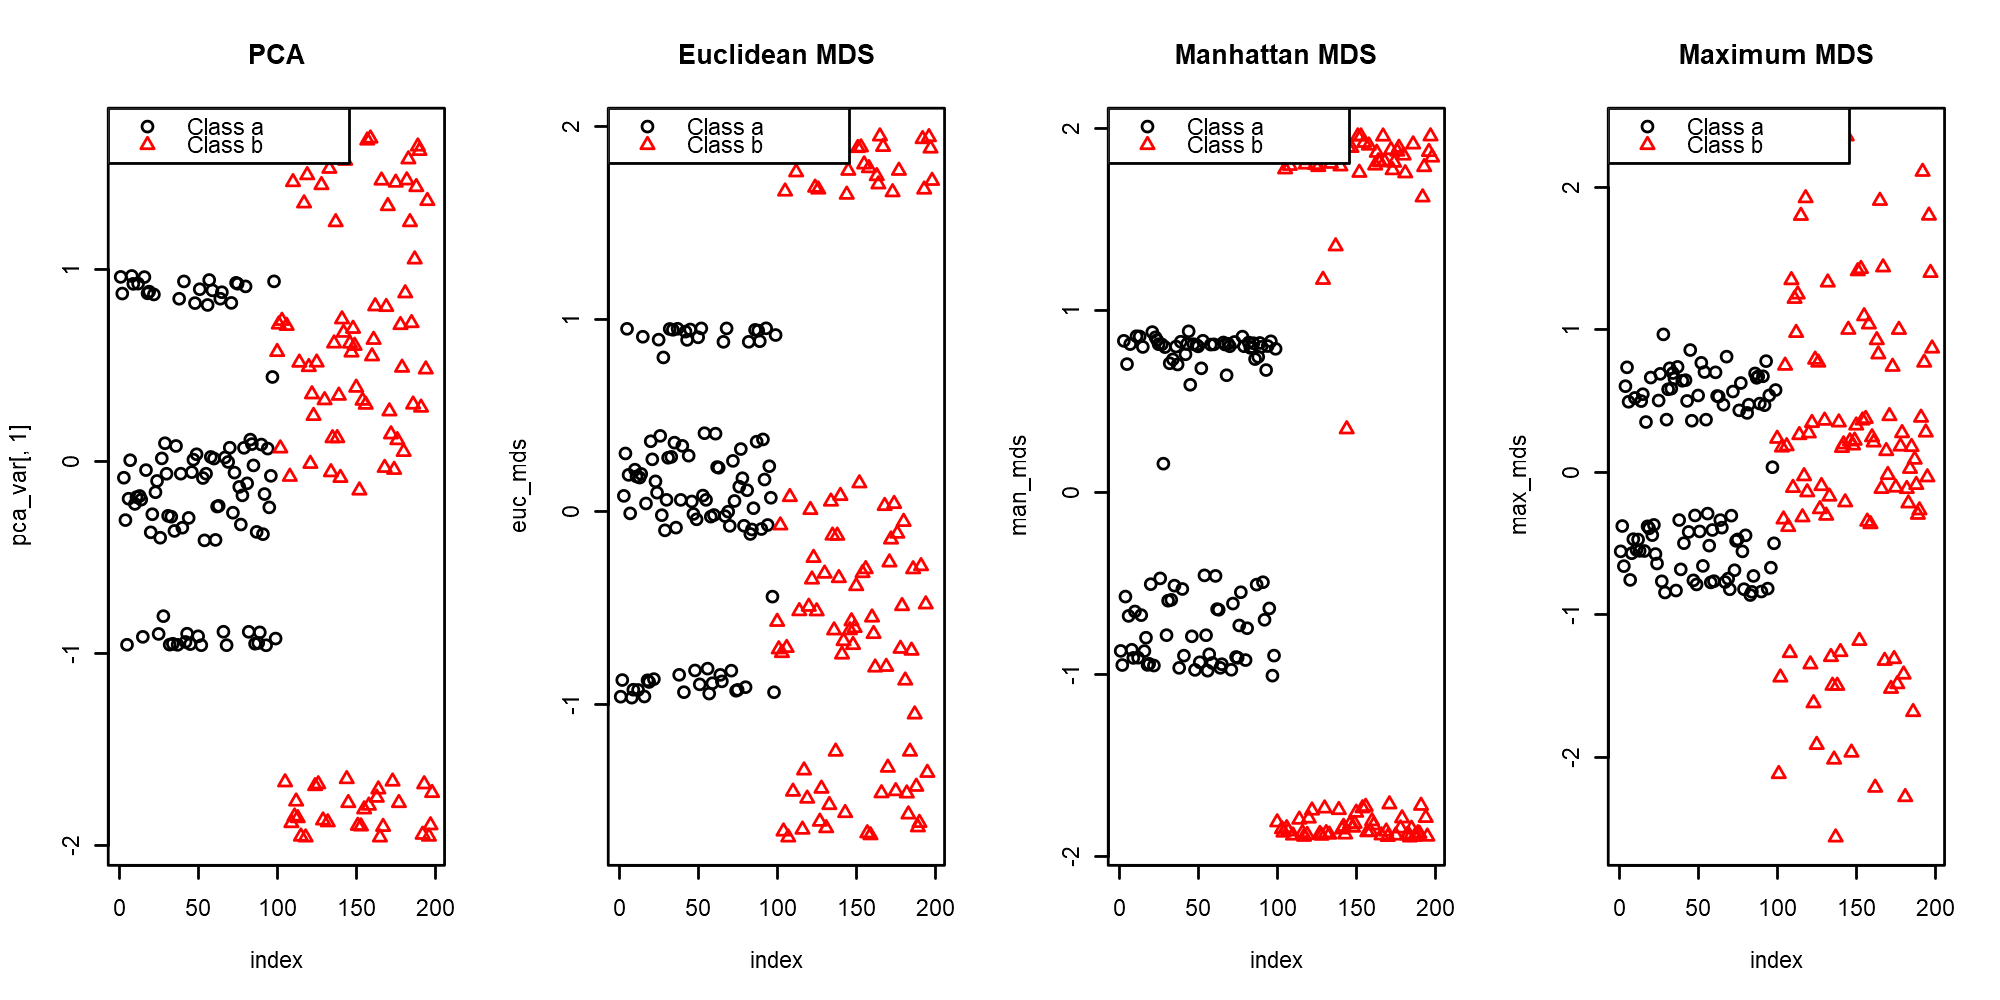

In [11]:
#layout(matrix(c(1,1,1,2,2,2,3,3,3,4,4,4), nrow = 3, ncol = 3, byrow = TRUE))
options(repr.plot.width = 10, repr.plot.height = 5, repr.plot.res = 200)
par(mfrow=c(1,4))
plot(x = c(1:nrow(pca_var)),y = pca_var[,1],col=lev,pch=lev, xlab = "index") + title("PCA")
legend("topleft",paste("Class",levels(dat[,3])),col=unique(lev), pch= unique(lev))
plot(x = c(1:nrow(dat)),y = euc_mds,col=lev,pch=lev, xlab = "index") + title("Euclidean MDS")
legend("topleft",paste("Class",levels(dat[,3])),col=unique(lev), pch= unique(lev))
plot(x = c(1:nrow(dat)),y = man_mds,col=lev,pch=lev, xlab = "index") + title("Manhattan MDS")
legend("topleft",paste("Class",levels(dat[,3])),col=unique(lev), pch= unique(lev))
plot(x = c(1:nrow(dat)),y = max_mds,col=lev,pch=lev, xlab = "index") + title("Maximum MDS")
legend("topleft",paste("Class",levels(dat[,3])),col=unique(lev), pch= unique(lev))

PCA does not seem to work well, because there is no such a (linear) horizontal separation between classes. For example, between 0 and 1, pca value does not imply a clear distinction between classes.

Furthermore,
PCA and MDS with euclidean distance seem to be symmetric since PCA uses euclidean distance as well.

It is obvious that the performance of MDS depends on the distance measure. for different measures, we see different transformations.

Only MDS with Manhattan distance can differentiate classes nicely. However,it is not a binary distinction. That is, when mds value is between -1 and 1, a data point is much likely to belong to class a. So, in order to correctly find out class a , we need to cut the space twice.

As a result, PCA did not work satisfactorily in the nonlinear data set. Nonlinearity is stil preserved in transformed components. MDS was better in this data set overallas it provides us with the freedom of choosing the distance measure. 

## Adding Extra Features

In [12]:
dat_dt = as.data.table(dat)
dat_dt[, `:=` (X1_sq = X1^2,
               X2_sq = X2^2,
               X1X2 = X1*X2)]
summary(dat_dt)

       X1                X2          class      X1_sq              X2_sq       
 Min.   :-2.0000   Min.   :-1.7908   a:99   Min.   :0.003305   Min.   :0.0000  
 1st Qu.:-0.7994   1st Qu.:-0.9445   b:99   1st Qu.:0.249322   1st Qu.:0.6560  
 Median :-0.2408   Median : 0.2578          Median :0.457800   Median :0.8974  
 Mean   :-0.1147   Mean   : 0.1006          Mean   :0.708035   Mean   :1.7920  
 3rd Qu.: 0.5128   3rd Qu.: 0.9786          3rd Qu.:0.812388   3rd Qu.:3.2030  
 Max.   : 1.8671   Max.   : 1.9992          Max.   :4.000000   Max.   :3.9967  
      X1X2         
 Min.   :-1.99945  
 1st Qu.:-0.49940  
 Median :-0.30717  
 Mean   :-0.01055  
 3rd Qu.: 0.49849  
 Max.   : 1.99978  

In [15]:
cor(dat_dt[,-3])

,X1,X2,X1_sq,X2_sq,X1X2
X1,1.0000000000,0.0008849583,-0.21732096,0.110299430,-0.418221702
X2,0.0008849583,1.0000000000,-0.46385646,0.337210928,-0.054897012
X1_sq,-0.2173209550,-0.4638564555,1.00000000,-0.047837447,0.086866167
X2_sq,0.1102994296,0.3372109275,-0.04783745,1.000000000,0.003243515
X1X2,-0.4182217020,-0.0548970116,0.08686617,0.003243515,1.000000000


Correlation between features are not high. Therefore, I do not expect that pca would work successfully.

In [13]:
pca_dat_dt <- princomp(dat_dt[,-3], cor = TRUE, scores = TRUE)
summary(pca_dat_dt, loadings = TRUE)

eigen = pca_dat_dt$sdev^2
print("eigenvalues: ")
eigen

Importance of components:
                          Comp.1    Comp.2    Comp.3    Comp.4     Comp.5
Standard deviation     1.3114557 1.1508988 0.9723549 0.7988684 0.60979578
Proportion of Variance 0.3439832 0.2649136 0.1890948 0.1276382 0.07437018
Cumulative Proportion  0.3439832 0.6088968 0.7979917 0.9256298 1.00000000

Loadings:
      Comp.1 Comp.2 Comp.3 Comp.4 Comp.5
X1     0.419  0.556  0.128  0.571  0.415
X2     0.538 -0.454        -0.368  0.600
X1_sq -0.539  0.162  0.578 -0.273  0.524
X2_sq  0.351 -0.313  0.797  0.127 -0.356
X1X2  -0.348 -0.600         0.669  0.258

Comp.1    Comp.2    Comp.3    Comp.4    Comp.5 
1.7199160 1.3245681 0.9454741 0.6381908 0.3718509

Eigenvalues represent the variance in the transformed values (componenets). In a sense, they are the width of the covarage in new axis.

Therefore, more explicable components are the ones with the highes eigenvalue.

In this pca study, almost 61% of the total variability is represented by the first two components. Some can define this a successful application.

# Task 2: Reconstructig Turkey Map

In [ ]:
library("readxl")
# xls files
tr_data <- read_excel("ilmesafe.xls",skip=2)

In [ ]:
tr_data

In [ ]:
tr_data[is.na(tr_data)] <- 0
tr_lev=tr_data$`IL ADI`

In [ ]:
#Apply MDS:
mds = cmdscale(tr_data[,-c(1:2)], k = 2) # obtain 2 dimension
plot(mds[,1], mds[,2],
    # main = "Familiarity with law vs Judicial integrity",
    # xlab = "Familiarity", ylab = "Integrity",
     pch = 18, col = "blue" ) + title("MDS")
# Plot the labels
text(mds[,1], mds[,2],
     labels = tr_lev,
     cex = 0.6, pos = 4, col = "red")

** Comment

# Task 3: Dimensionality Reduction for TimeSeries Data

In [ ]:
x_train = fread("./UWave/UWave/uWaveGestureLibrary_X_TRAIN.csv")
y_train = fread("./UWave/UWave/uWaveGestureLibrary_Y_TRAIN.csv")
z_train = fread("./UWave/UWave/uWaveGestureLibrary_Z_TRAIN.csv")

# add idx to the data sets
x_train[, idx := 1:.N]
y_train[, idx := 1:.N]
z_train[, idx := 1:.N]

# Calculate velocity and locations 
x_loc = copy(x_train)
y_loc = copy(y_train)
z_loc = copy(z_train)

# velocity
x_loc[, paste0("V",(2:316)) := as.list(cumsum(unlist(.SD))), 1:nrow(x_loc),.SDcols = paste0("V",(2:316))]
y_loc[, paste0("V",(2:316)) := as.list(cumsum(unlist(.SD))), 1:nrow(y_loc),.SDcols = paste0("V",(2:316))]
z_loc[, paste0("V",(2:316)) := as.list(cumsum(unlist(.SD))), 1:nrow(z_loc),.SDcols = paste0("V",(2:316))]

# locations
x_loc[, paste0("V",(2:316)) := as.list(cumsum(unlist(.SD))), 1:nrow(x_loc),.SDcols = paste0("V",(2:316))]
y_loc[, paste0("V",(2:316)) := as.list(cumsum(unlist(.SD))), 1:nrow(y_loc),.SDcols = paste0("V",(2:316))]
z_loc[, paste0("V",(2:316)) := as.list(cumsum(unlist(.SD))), 1:nrow(z_loc),.SDcols = paste0("V",(2:316))]

In [ ]:
# consider gestures listed below 
x_loc[,.(idx_ref = min(idx)),.(V1)][order(V1)]

idx_ref = x_loc[,.(idx_ref = min(idx)),.(V1)][order(V1)]$idx_ref

In [ ]:
x_loc_molten = melt(x_loc[idx %in% idx_ref], id.vars=c("idx","V1"))
y_loc_molten = melt(y_loc[idx %in% idx_ref], id.vars=c("idx","V1"))
z_loc_molten = melt(z_loc[idx %in% idx_ref], id.vars=c("idx","V1"))

setnames(x_loc_molten,"value","x")
setnames(y_loc_molten,"value","y")
setnames(z_loc_molten,"value","z")

data = merge(x_loc_molten,y_loc_molten, by = c("idx","V1","variable"), all.x = TRUE)
data = merge(data,z_loc_molten, by = c("idx","V1","variable"), all.x = TRUE)

data$V1 = as.factor(data$V1)
head(data)

In [ ]:
library(scatterplot3d)
max_x <- max(data$x)
min_x <- min(data$x)
max_y <- max(data$y)
min_y <- min(data$y)
max_z <- max(data$z)
min_z <- min(data$z)



for( i in idx_ref){
    focus_dt = data[idx == i] 
    gesture = unique(focus_dt$V1)
    
options(repr.plot.width = 7, repr.plot.height = 5, repr.plot.res = 200)
par(mfrow=c(1,1))
scatterplot3d(focus_dt[,.(x,y,z)],col.axis="orange"
                  ,main = paste0("GESTURE_",gesture)
                  ,xlab = "X location"
                  ,ylab = "Y location"
                  ,zlab = "Z location"
                  ,col.grid="lightblue"
           #       ,type = "h"
                  ,color = "steelblue"
           #   ,xlim=c(min_x,max_x)
           #   ,ylim=c(min_y,max_y)
           #   ,zlim=c(min_z,max_z)
             )
}




## PCA

In [ ]:
colnames(x_train) <- paste("x", colnames(x_train), sep = "_")
colnames(y_train) <- paste("y", colnames(y_train), sep = "_")
colnames(z_train) <- paste("z", colnames(z_train), sep = "_")
setnames(x_train,c("x_V1","x_idx"),c("class","idx"))
setnames(y_train,c("y_V1","y_idx"),c("class","idx"))
setnames(z_train,c("z_V1","z_idx"),c("class","idx"))

dt = merge(x_train,y_train, by = c("class","idx"), all = TRUE)
dt = merge(dt,z_train, by = c("class","idx"), all = TRUE)
head(dt)

*Since princomp does not work when p > n, I'll use prcomp*

In [ ]:
gesture_list = c(1:8)
for( i in gesture_list){
    focus_dt = dt[class == i] 
    pca_data <- prcomp(focus_dt[,-c(1:2)],scale =T)
    assign(paste0("pca_",i), pca_data) 
}

In [ ]:
draw_eigenv = function(pca,gesture){
    plot(pca$rotation[,2], type="l",col="orange", main= paste0("Gesture_",gesture), ylab= "Eigenvector")
    points(pca$rotation[,1],type="l",col="blue")
    legend("topleft",paste("Eigenvector",c("2","1")),col=c("orange", "blue"), pch= 16,cex= 0.6)
}


calc_cum_var = function(pca){
props = (pca$sdev^2) / sum(pca$sdev^2)
return(cumsum(props))
}

print_cum_var = function(pca){
    print(paste0(100*round(calc_cum_var(pca)[2],3),"% of variability is covered by the first two components."))

}


### Gesture 1

In [ ]:
print_cum_var(pca_1)
summary(pca_1)
draw_eigenv(pca_1,1)

### Gesture 2

In [ ]:
print_cum_var(pca_2)
summary(pca_2)
draw_eigenv(pca_2,2)

In [ ]:
pattern_dt = data.table(axis = c(rep("x",315),rep("y",315),rep("z",315))
                       ,vector1 = pca_2$rotation[,1]
                       ,vector2 = pca_2$rotation[,2]
                       ,index = rep(c(1:315),3))

pattern_dt_molten= melt(pattern_dt, id.vars = c("axis","index"))
options(repr.plot.width = 10, repr.plot.height = 5, repr.plot.res = 200)
ggplot(data = pattern_dt_molten, aes(x = index, y = value, group = axis, color = axis) ) + geom_line() + facet_wrap(~variable)

### Gesture 3

In [ ]:
print_cum_var(pca_3)
summary(pca_3)
draw_eigenv(pca_3,3)

### Gesture 4

In [ ]:
print_cum_var(pca_4)
summary(pca_4)
draw_eigenv(pca_4,4)

### Gesture 5

In [ ]:
print_cum_var(pca_5)
summary(pca_5)
draw_eigenv(pca_5,5)

### Gesture 6

In [ ]:
print_cum_var(pca_6)
summary(pca_6)
draw_eigenv(pca_6,6)

### Gesture 7

In [ ]:
print_cum_var(pca_7)
summary(pca_7)
draw_eigenv(pca_7,7)

### Gesture 8

In [ ]:
print_cum_var(pca_8)
summary(pca_8)
draw_eigenv(pca_8,8)